In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

%load_ext autoreload
%autoreload 2

In [2]:
from cs_portfolio_project.optimisation.asset_analysis import *

# AssetAnalysis Class 
 `AssetAnalysis` is used to easily analyse different assets

## Purpose:
It is built to:
- Load and preprocess cs2 skins data from a CSV file or a pandas DataFrame with dily prices.
- Compute returns, covariance matrices, and correlations for portfolio analysis.
- Perform advanced financial calculations, such as alpha and beta using the Capital Asset Pricing Model (CAPM).
- Generate interactive and static visualizations, including efficient frontiers, correlation matrices, and clustering plots.
- Analyze relationships between asset returns and external factors (e.g., player activity data).

It is useful for portfolio optimization, risk analysis, and understanding skins behavior.



### Initialization 
parameters:
- **`csv_or_df`**: Either a file path to a CSV file or a pandas DataFrame containing asset price data, with dates as the index and asset names as columns.
- **`risk_free_rate`**: The risk-free rate (default: 0.0) used for portfolio calculations like the efficient frontier.
- **`resample_size`**: The frequency for resampling data (e.g., 'D' for daily, default: 'D').
- **`cov_method`**: The method for calculating the covariance matrix, either `'standard'`, `'ewma'` (exponentially weighted moving average), or a custom callable function (default: `'standard'`).
- **`lambda_`**: Decay factor for EWMA covariance calculation (default: 0.94).

In [3]:
assets = AssetAnalysis(r'../data/processed/D/cases.csv')

c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\asset_analysis.py:207: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.returns = self.data.pct_change().dropna(how='all')


weights : [6.52336439e+00 3.08903286e+00 1.02367030e-01 2.95192419e-01
 1.12862083e+00 9.49200991e-01 3.71087069e+00 1.60444134e+01
 4.48100983e+00 5.26248685e+00 5.10409412e+00 1.74822930e+00
 2.73047541e+00 6.10413879e+00 6.17021233e-01 0.00000000e+00
 1.03398131e+00 0.00000000e+00 1.05540196e-01 1.86880095e+00
 1.75117441e+00 1.75891917e+00 2.28254311e+00 3.98499256e+00
 0.00000000e+00 0.00000000e+00 7.13201742e-16 4.87890978e-17
 0.00000000e+00 2.78165620e-16 3.04486973e+00 2.02710998e+00
 1.78605367e-15 5.91402162e+00 4.55843522e+00 1.37790936e+01]
portfolio return (ann) : 1.0459584305413268
portfolio vol (ann): 5.545123587493762


Upon initialization, the class:
1. Loads and preprocesses the data
2. Calculates asset returns using percentage changes (daily or resampled).
3. Computes a market return. 
4. Generates asset information (via `asset_information`).
5. Creates a covariance matrix using the specified method.
6. Computes a correlation matrix and a distance matrix (1 - correlation).
7. Calculates the minimum variance portfolio weights.
8. Loads monthly cs2 players (could be useful for prediction models).

"market" is an equal weight portfolio of all assets. Similare to the way the SP500 would be considered the "market" in classical stock analysis. But using cap-weighted portoflio would not be useful with cs2 skins.

Uppon initlization, prints minimum variance portfolio information (asset weights, portofolio mean returns and mean vol (annulized))

## Key Methods
The class provides a variety of methods for financial analysis and visualization. Below is a summary of each method, its purpose, and its output.

### 1. `plot_corr_matrix()`
- Visualizes the correlation matrix of asset returns as a heatmap.
- Identify which assets move together or are inversely related.

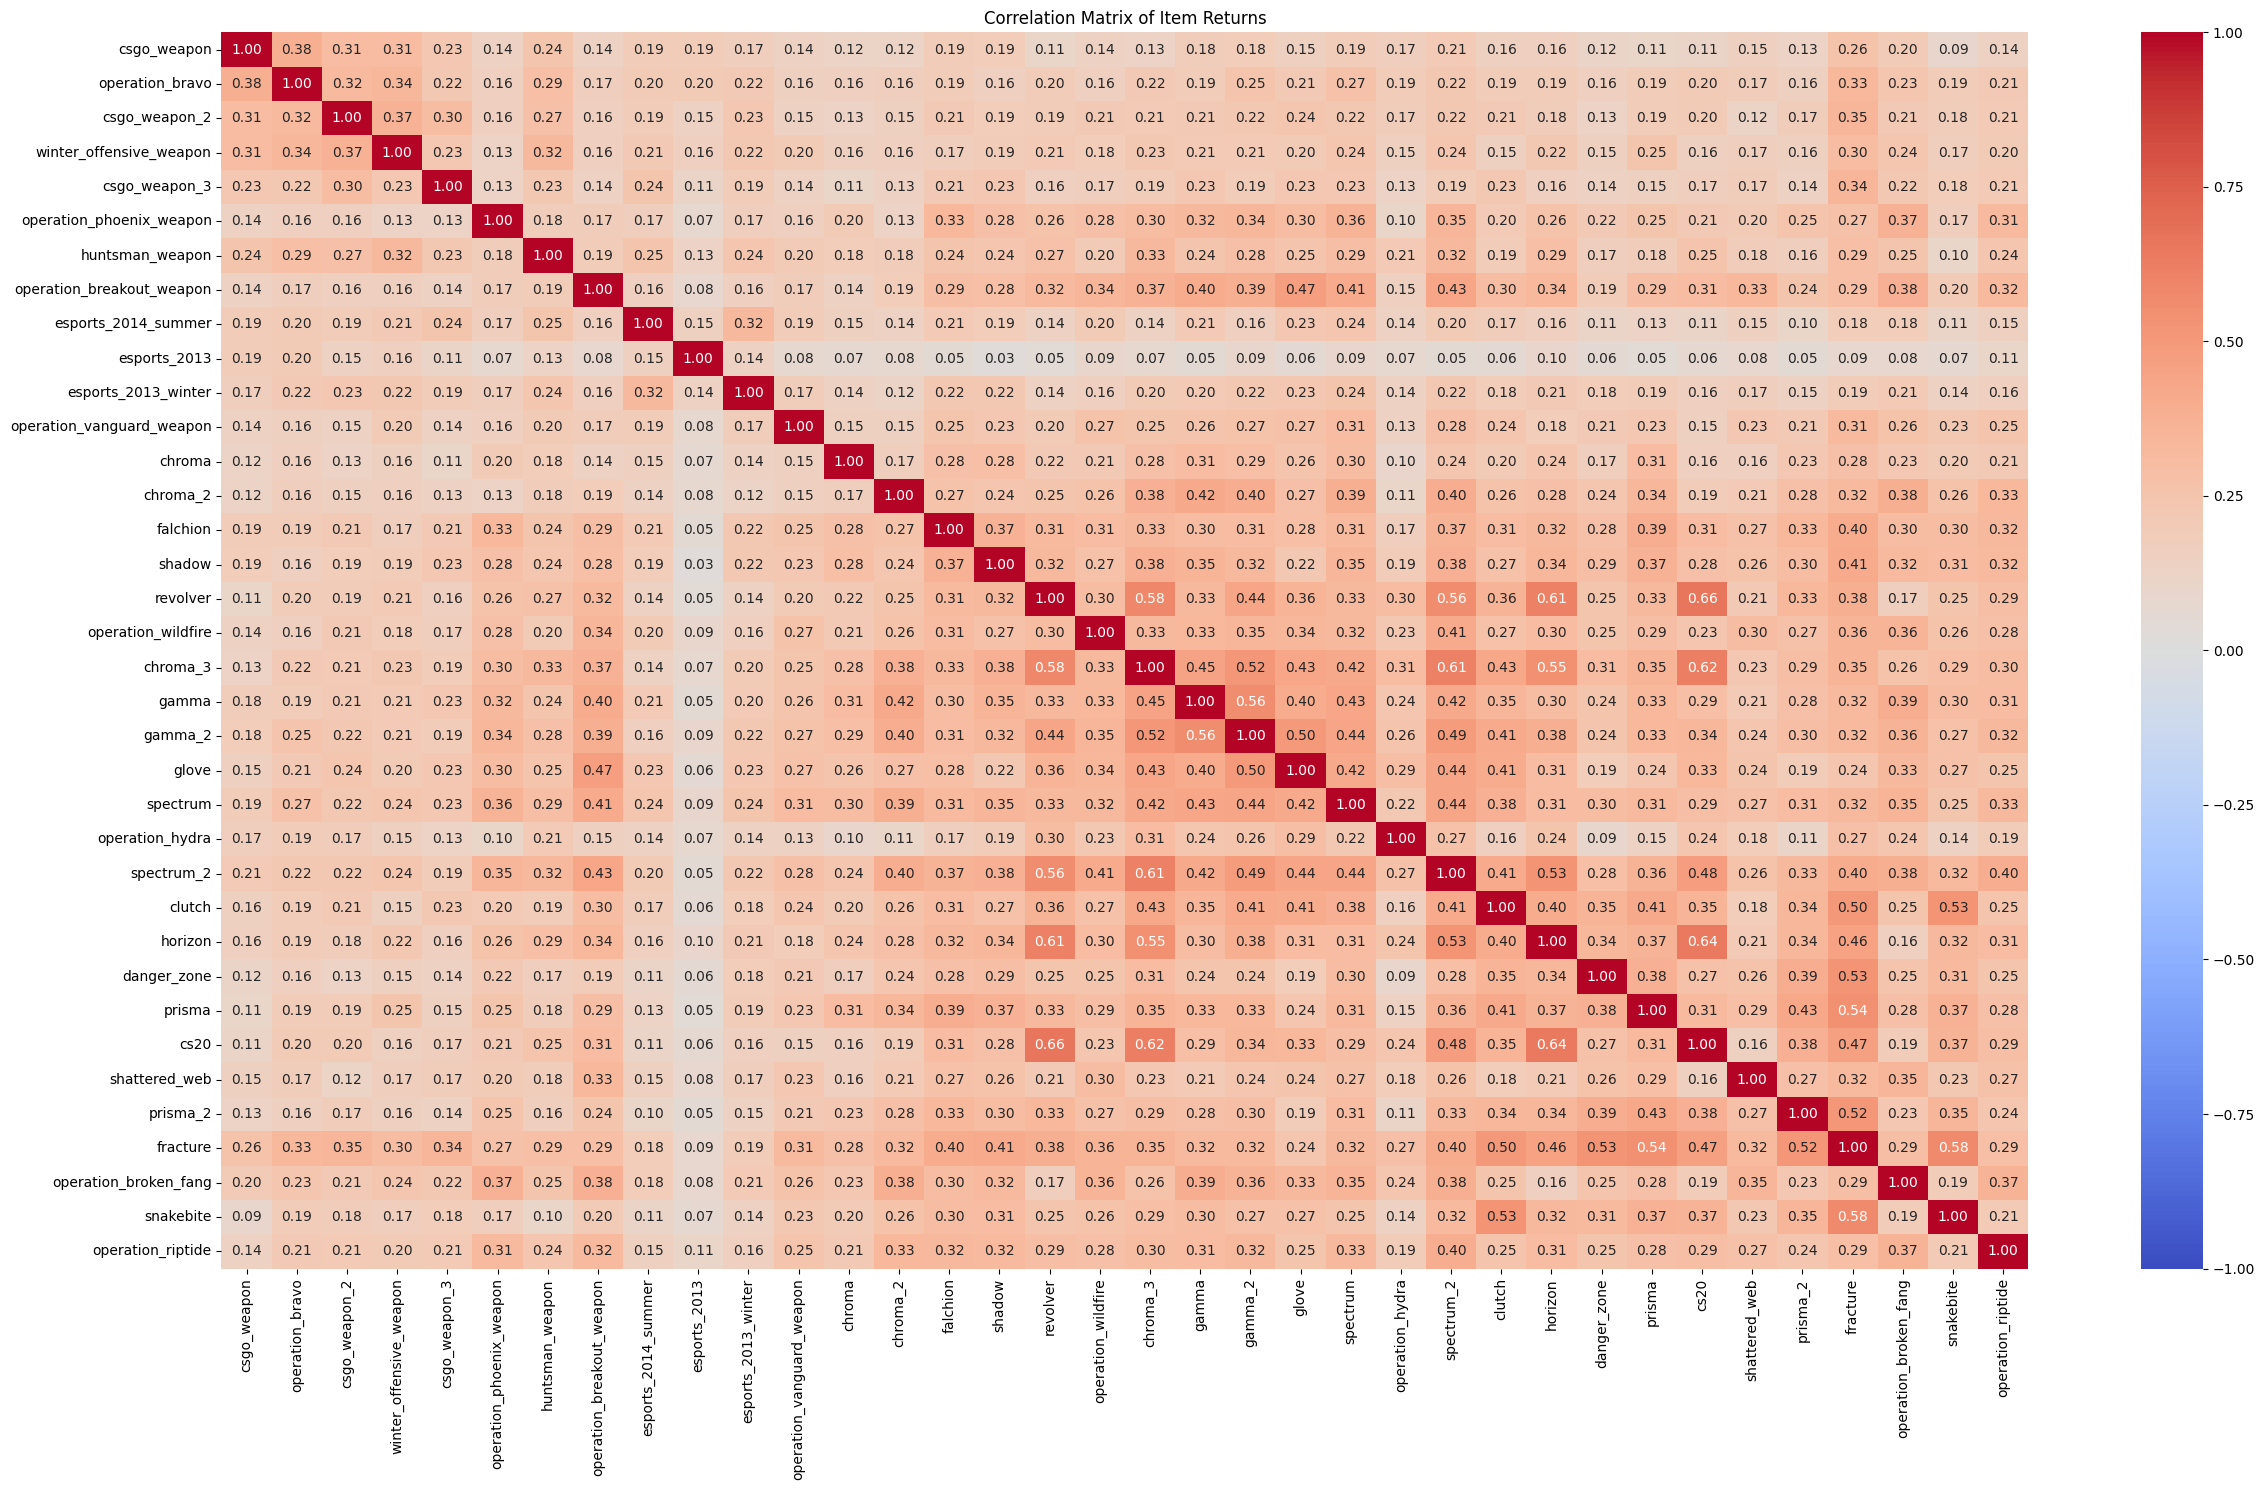

In [21]:
assets.plot_corr_matrix()

### 2. `alpha_and_beta()`
- Calculates the alpha (excess return) and beta (market sensitivity) for each asset using the CAPM model.
- assets perform relative to the market and their exposure to market risk.

In [24]:
assets.alpha_and_beta().head()

,Asset,Alpha,Beta
0,csgo_weapon,0.000304,0.735341
1,operation_bravo,-0.000761,0.867720
2,csgo_weapon_2,-0.000632,1.158543
3,winter_offensive_weapon,-0.001064,0.990611
4,csgo_weapon_3,-0.000207,0.998263


## Plots

### 3. `plot_eff_frontiere(n_points, risk_free_rate)`
- Plots the efficient frontier, showing optimal portfolios balancing risk and return.
- **Inputs**:
  - `n_points`: Number of points to plot on the frontier.
  - `risk_free_rate`: Optional risk-free rate (defaults to the initialized value).

### 4. `plot_corr_with_market()`
- Displays the correlation of each asset with the market as a bar plot.
- Understand which assets are most or least aligned with market movements.

### 5. `plot_alpha_and_beta()`
- Visualizes the alpha and beta coefficients for each asset.

### 6. `plot_market_vol(rolling_window=15)`
- Plots the rolling volatility of the market return.
- **Input**: `rolling_window` (default: 15) for the rolling window size in days.

### 7. `plot_price(name: str | list[str])`
- Plots the price history of one or more assets, or the markets cumulative return.
- **Input**: `name` as a string (asset name or 'market') or a list of asset names.

### 8. `plot_returns_distribution(bins, exclude_0=1)`
- **Purpose**: Plots the distribution of all asset returns as a histogram.
- **Inputs**:
  - `bins`: Number of bins for the histogram.
  - `exclude_0`: If 1 (default), excludes zero returns from the plot.
- Analyze the distribution and prints skewness and kurtosis

### 9. `Kmeans_PCA_plot(n_clusters)`
- Performs K-means clustering on assets based on their distance matrix and visualizes the results in a 2D PCA projection.
- **Input**: `n_clusters`: Number of clusters for K-means.
- Group similar assets based on correlation patterns and visualize their relationships.

### 10. `plot_players(asset='market', log=0)`
- **Purpose**: Plots the relationship between an asset’s returns (or market returns) and player activity data.
- **Inputs**:
  - `asset`: Asset name or 'market' (default: 'market').
  - `log`: If 1, applies logarithmic scaling (default: 0).
- vizualize correlation between prices and player base

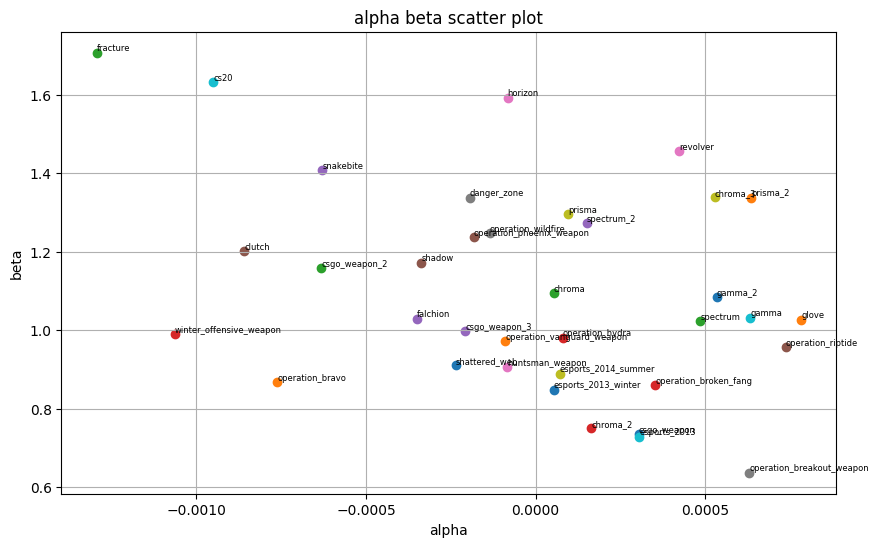

In [28]:
assets.plot_alpha_and_beta()

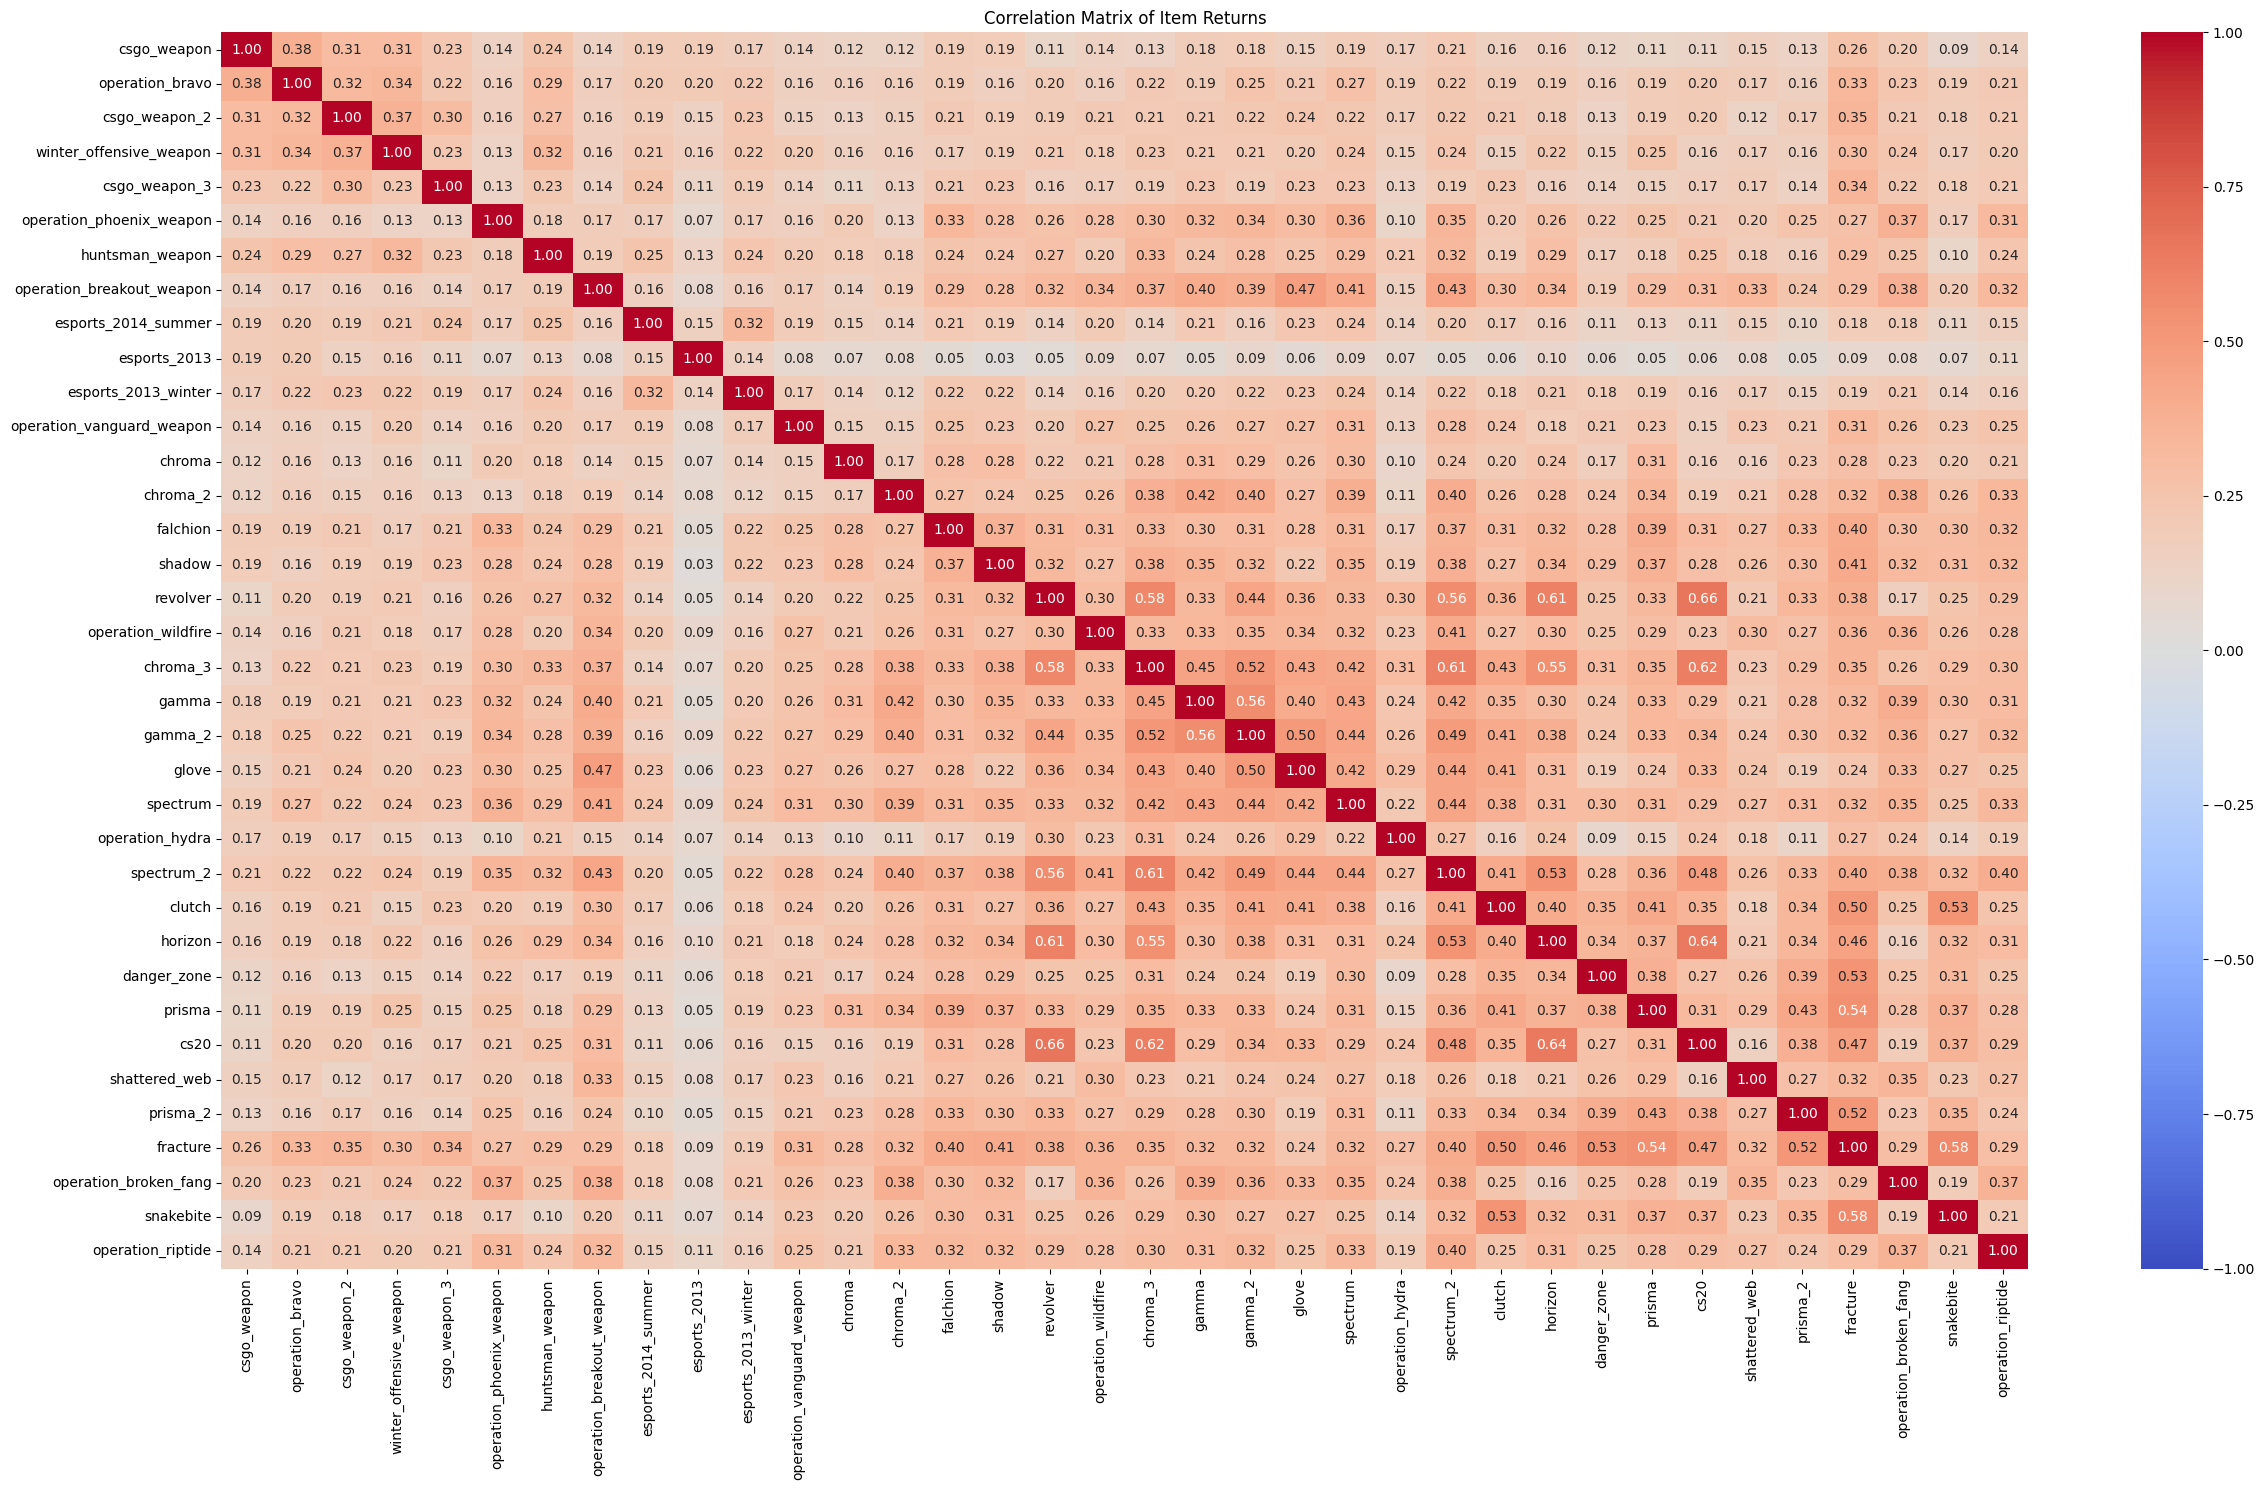

In [33]:
assets.plot_corr_matrix()

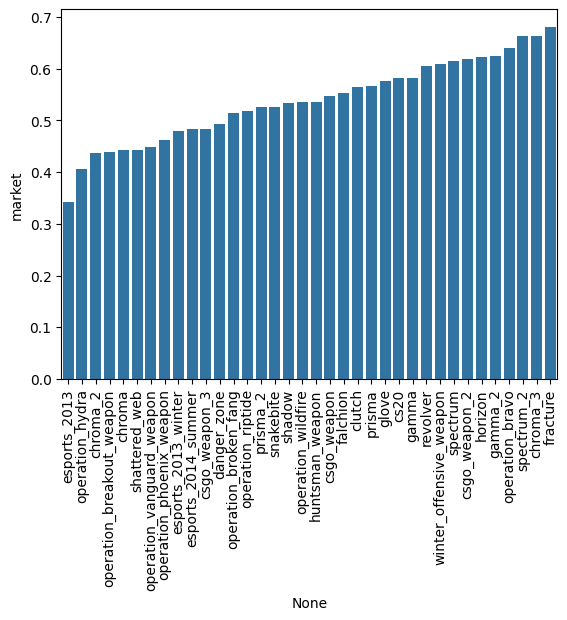

In [34]:
assets.plot_corr_with_market()

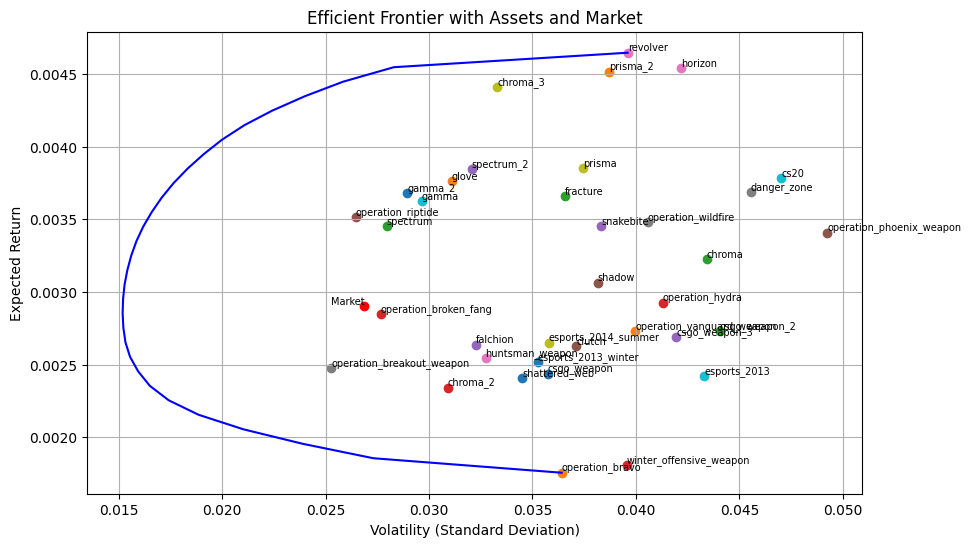

In [36]:
assets.plot_eff_frontiere(30)

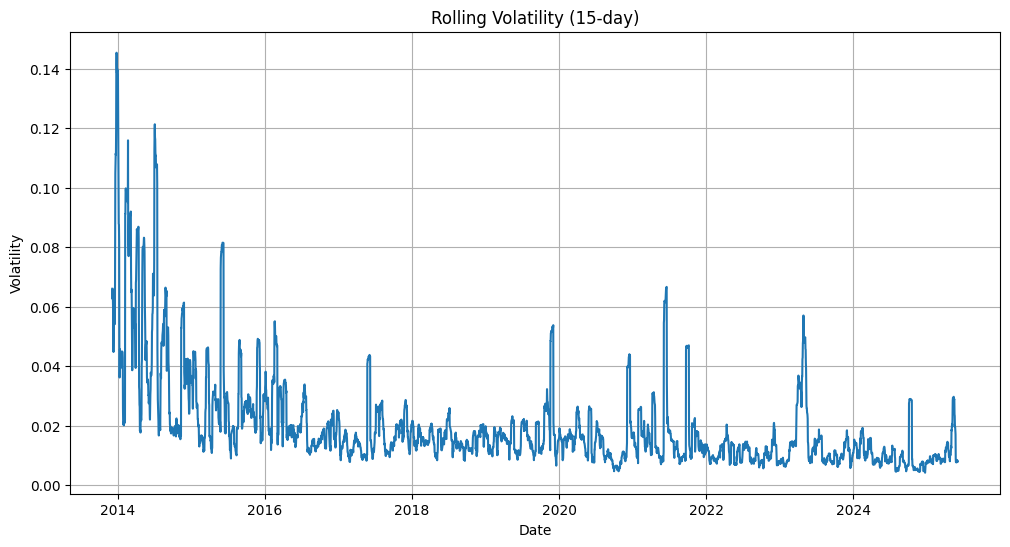

In [37]:
assets.plot_market_vol()

In [39]:
assets.plot_returns_distribution(500)

mean=0.0024317809608402504, std=0.03899947100708087
skewness=1.7320708418383002, kurtosis=40.51296232179305


In [30]:
assets.plot_price(['shadow','revolver'])

In [32]:
assets.plot_players()

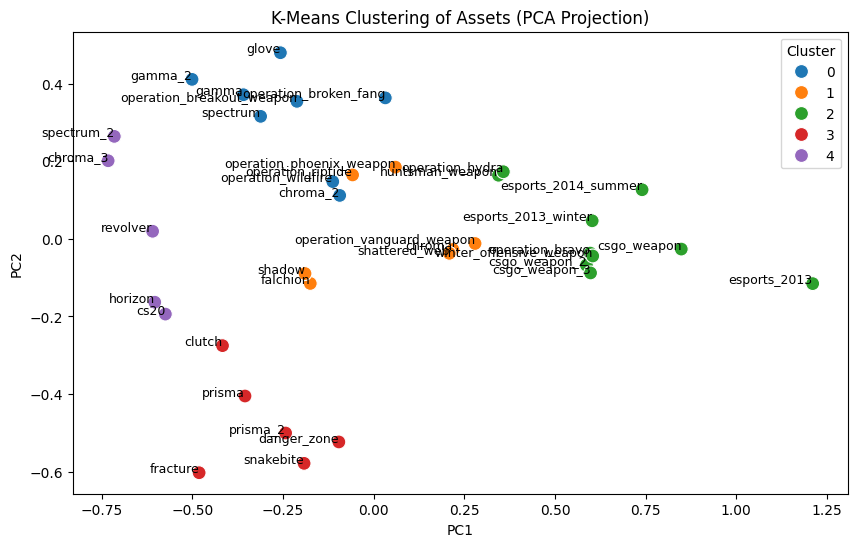

In [31]:
assets.Kmeans_PCA_plot(5)

In [21]:
from cs_portfolio_project.optimisation.portfolio import plot_backtest_vs_eq

from cs_portfolio_project.optimisation.portfolio import backtest

### backtesting and comparing with market
- backtest and plot a portfolio optimization strategy against the market (equal weight)
- **Inputs**:
  - `rets`: all asset returns (eq weight).
  - `market`:  market returns (eq weight).
  - `weight_func`: function used to calculated optimal weights (default: minimum var portfolio)
  - `rebalancing`: portfolio rebalancing timeframe (detault; yearly). ex 'M', '6M', 'Y',...
  - `risk_free_rate`: risk free rate (detault; 0).
  - `days_in_sample`: number of days for annulization (default: 365 for daily data)
  - `weight_func`: custom weight function for portfolio construction (default: minimum variance portfolio).
  - `expected_returns_func`: custom expected returns function (ex: CAPM)
  - `covariance_func`: custom covariance function (default: returns.cov).
  - `expected_returns_kwargs: dict = {},covariance_kwargs: dict = {},weight_func_kwargs: dict = {}` arguments for custom functions

plot_backtest_vs_eq plots the backtest and the market (equal weight) using log returns

In [62]:
test= backtest(assets.rets_and_market)

c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\portfolio.py:319: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\portfolio.py:330: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



<string>:24: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<string>:44: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



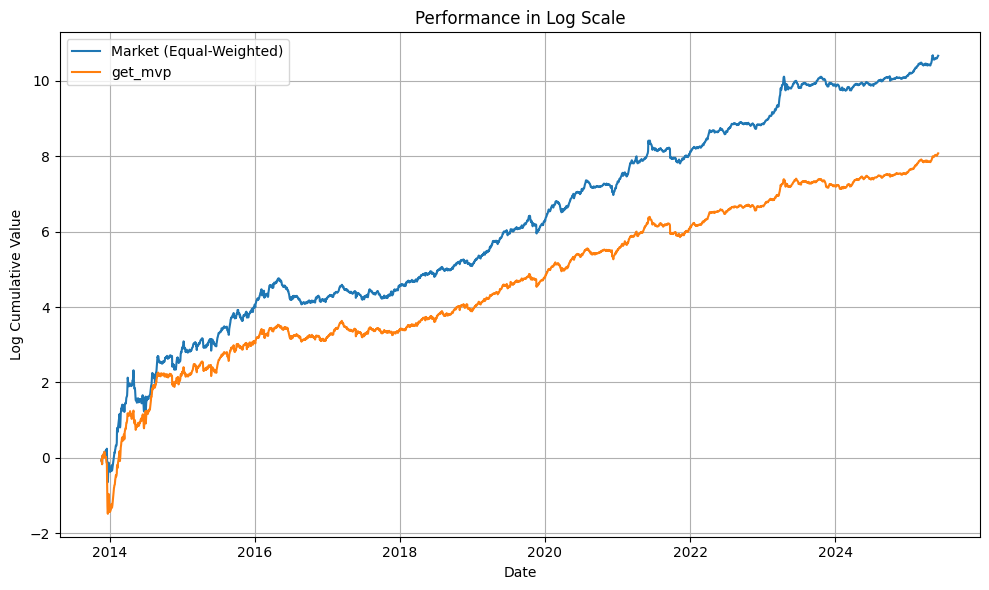

In [ ]:
plot_backtest_vs_eq(assets.returns,assets.marketret)

c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\portfolio.py:450: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  periods = rets_copy.groupby(pd.Grouper(freq=rebalancing))
c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\portfolio.py:500: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  portfolio_returns = pd.concat([portfolio_returns, period_portfolio_returns])


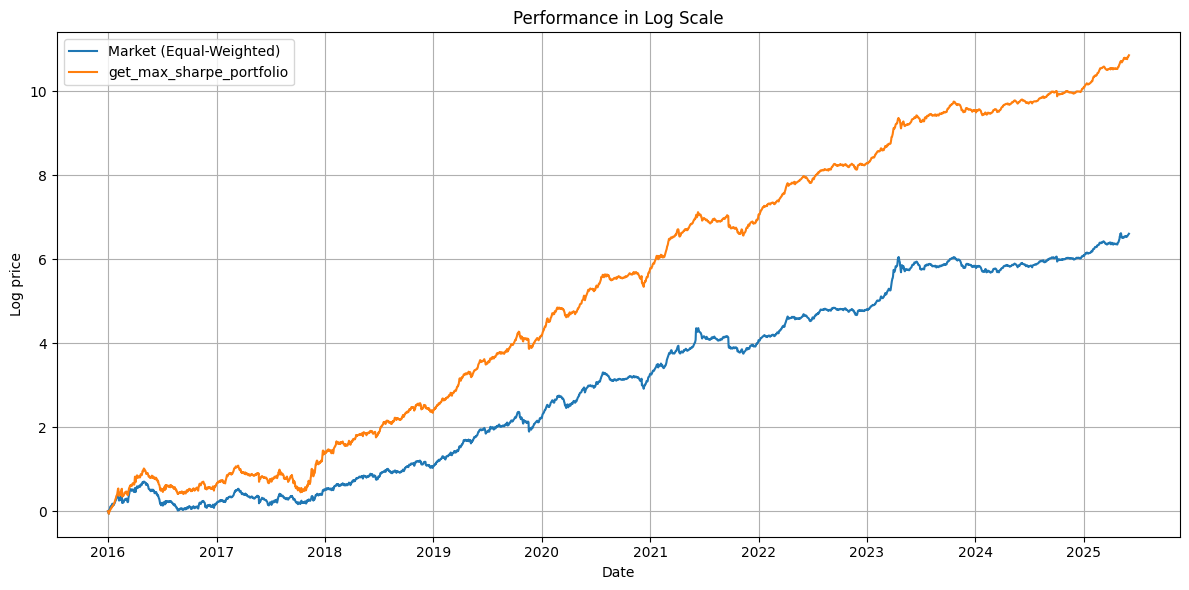

In [4]:
plot_backtest_vs_eq(
    rets=assets.returns.loc['2016':],
    market=assets.marketret.loc['2016':],
    weight_func=get_max_sharpe_portfolio,
    rebalancing='6M',
    expected_returns_func=get_expected_returns_CAPM,
    expected_returns_kwargs={"risk_free_rate": 0.0,"market_rets":assets.marketret},
    weight_func_kwargs={"min_vol_threshold": 1e-6}
)

### Black Litterman
The Black-Litterman model is a portfolio optimization framework that combines market equilibrium returns (derived from asset prices and a market portfolio) with an investor’s subjective views to generate expected returns for assets. The functions take as input the view of the investor:
- **'outperforming_assets'**: list of assets that will outperform the other
- **'outperforming_values'**: list of outperformance values (ex: 0.01 -> 1% outperformance of a given asset commpared to others)

In [5]:
from cs_portfolio_project.optimisation.black_litterman import *

In [6]:
# get_bl_mu_and_sigma takes 2 lists as input: 
# outperforming assets: 
mu_bl, sigma_bl=get_bl_mu_and_sigma(assets.returns,['csgo_weapon','operation_bravo'],[0.0007,0.0008],market_rets=assets.marketret)

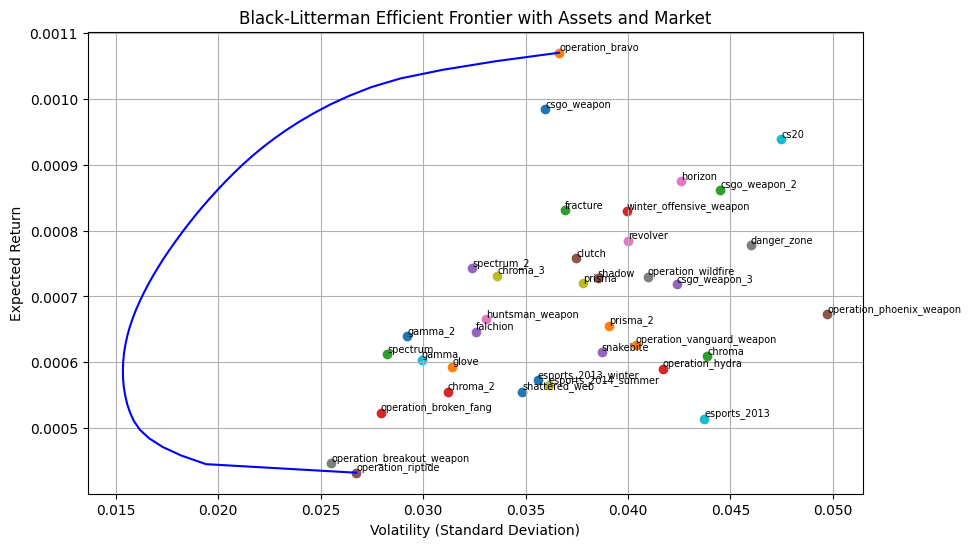

In [28]:
plot_bl_efficient_frontier(mu_bl, sigma_bl)


c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\portfolio.py:500: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  portfolio_returns = pd.concat([portfolio_returns, period_portfolio_returns])


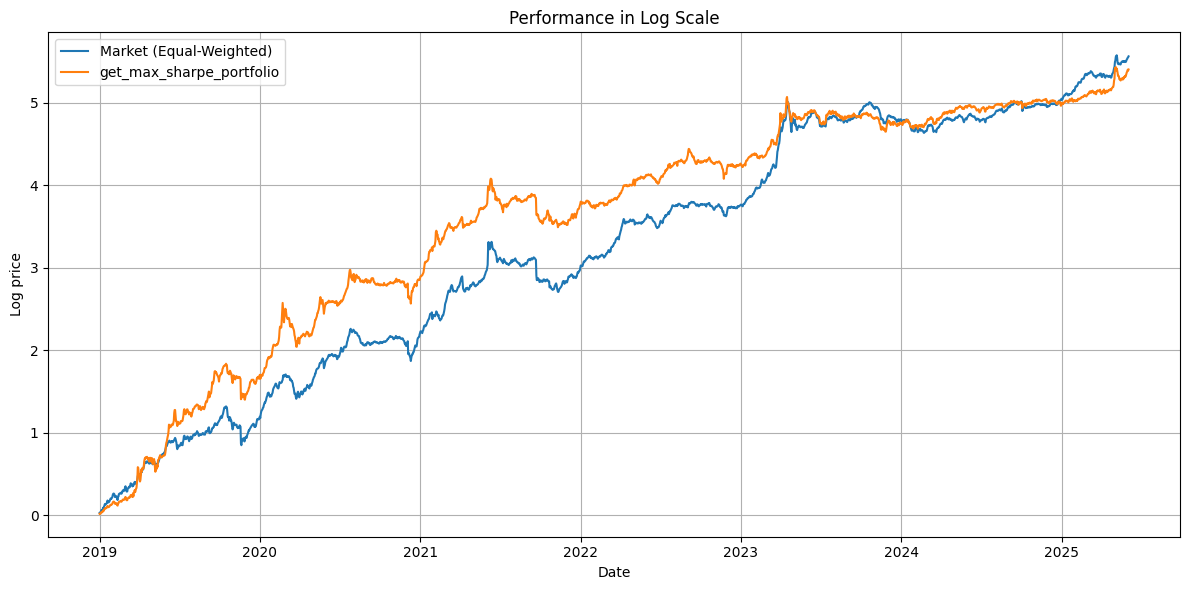

In [9]:
plot_backtest_vs_eq(
    rets=assets.returns.loc['2019':],
    market=assets.marketret.loc['2019':],
    weight_func=get_max_sharpe_portfolio,
    rebalancing='YE',
    expected_returns_func=get_bl_mu,
    covariance_func=get_bl_sigma,


    expected_returns_kwargs={"market_rets":assets.marketret,'outperforming_assets':['operation_breakout_weapon'],'outperformance_values':[0.005]},
    covariance_kwargs={"market_rets":assets.marketret,'outperforming_assets':['operation_breakout_weapon'],'outperformance_values':[0.005]},

    weight_func_kwargs={"min_vol_threshold": 1e-6}
)